# Clustering Jerarquico Completo

- X dataset (array de n x m) de puntos a clusterizar
- n número de datos (filas)
- m número de rasgos (columnas)
- Z array de enlace del cluster con la info de uniones
- k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np

(150, 2)


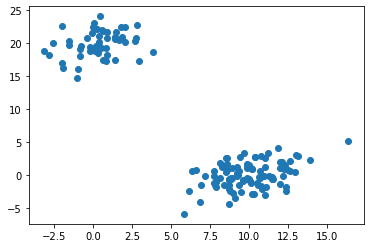

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,]) # Puntos con normal 10,0 y desviación típica de 3 en horiz 4 en vert
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,]) # Puntos con normal 0,20 y desviación típica de 3 en horiz 4 en vert
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1]);

In [3]:
# Linkage Matrix
Z = linkage(X,'ward',metric='euclidean') # punto1 , punto2 , distancia entre punto 1 y 2 , número de elementos en el cluster
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [4]:
# 98% de conservación de las distancias originales
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [5]:
Z[152-len(X)] # Cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [6]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

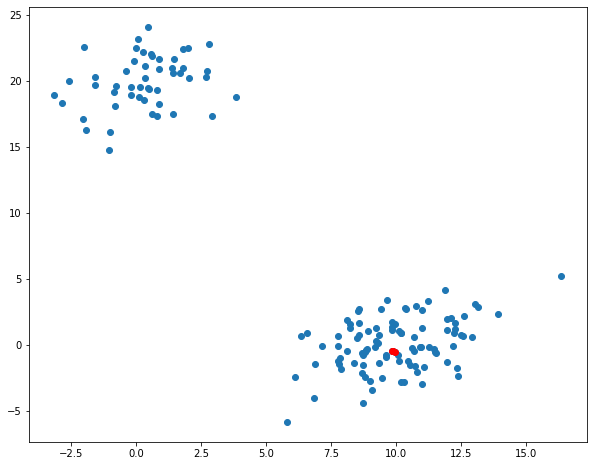

In [7]:
idx=[33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) # Pintar puntos
plt.scatter(X[idx,0],X[idx,1],c='r');

### 1. Representación del Dendrograma

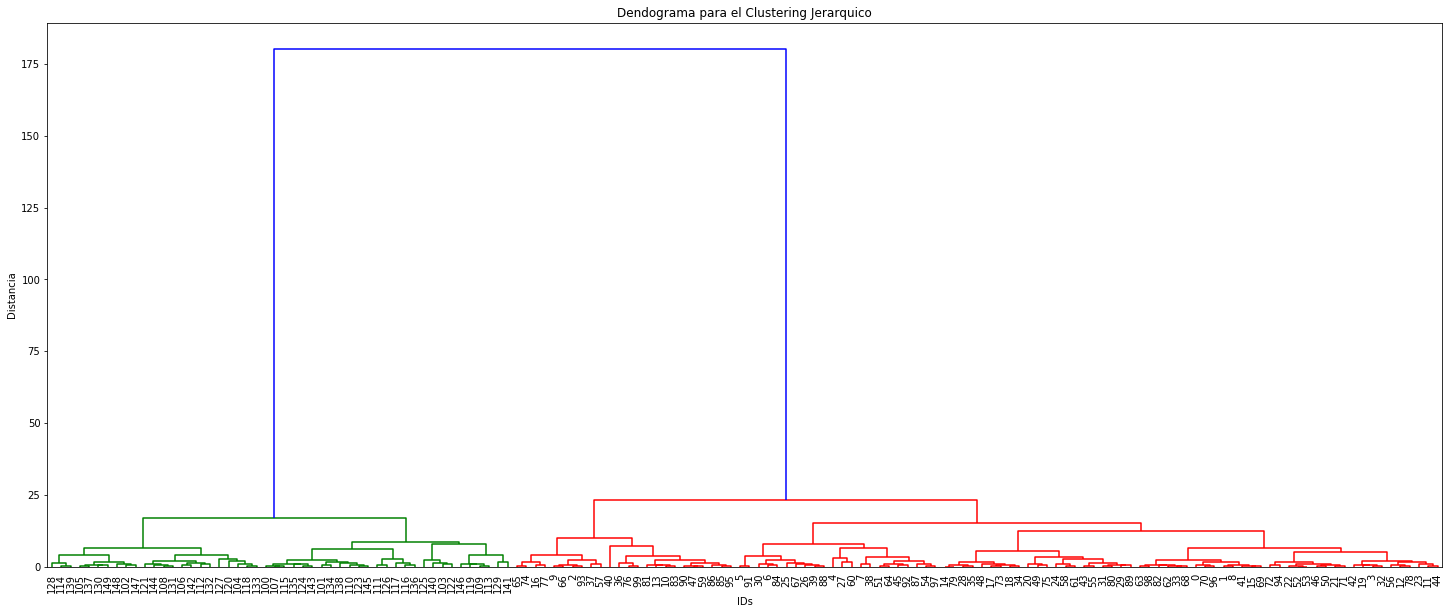

In [8]:
# Plot Dendrogram 
plt.figure(figsize=(25,10))
plt.title('Dendograma para el Clustering Jerarquico')
plt.xlabel('IDs')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.show();

In [9]:
Z[-4:,] # Últimos 4 clusters

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### 2. Truncar el Dendrograma

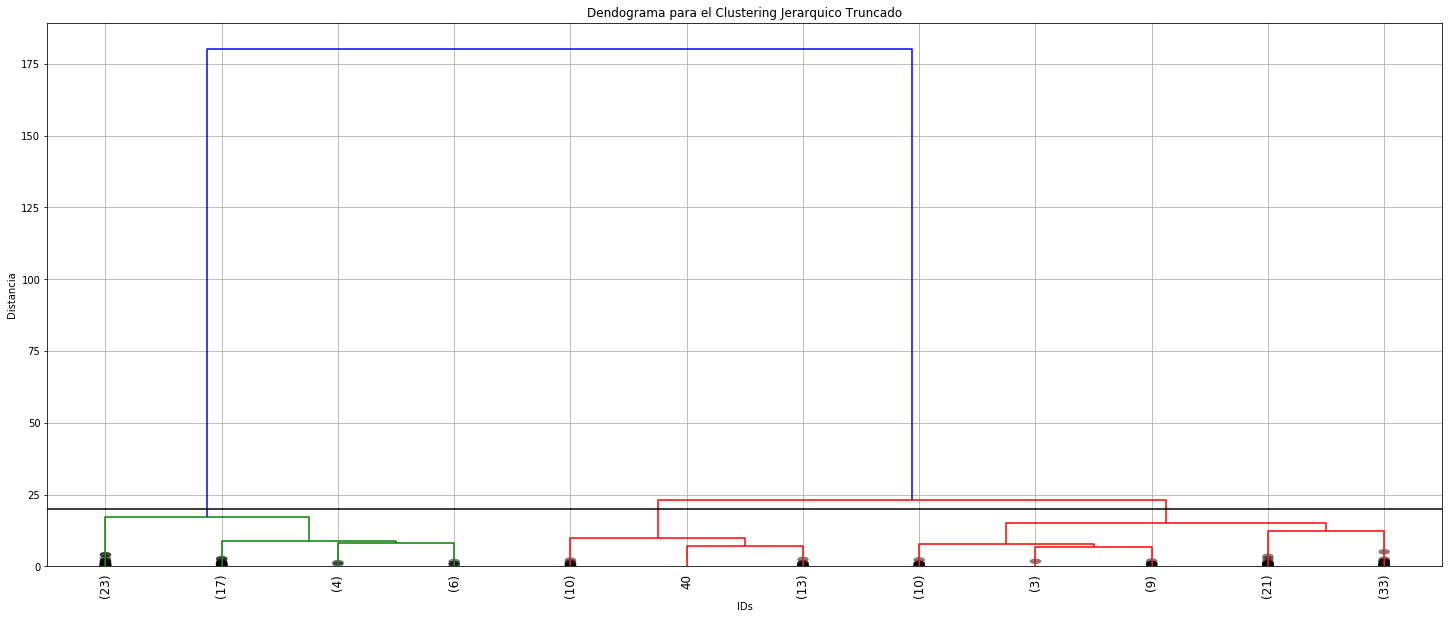

In [10]:
# Plot Dendrogram Se muestran las diez últimas uniones porque lo hemos truncado
plt.figure(figsize=(25,10))
plt.title('Dendograma para el Clustering Jerarquico Truncado')
plt.xlabel('IDs')
plt.ylabel('Distancia')
plt.grid(True)
dendrogram(Z, leaf_rotation=90, leaf_font_size=12,truncate_mode='lastp',p=12,show_leaf_counts=True,show_contracted=True)
plt.axhline(y=20,c='k')
plt.show();

### 3. Corte automático del Dendrograma

### 3.1 Inconsistencia
###### No sirve de mucho este método

In [11]:
from scipy.cluster.hierarchy import inconsistent

In [14]:
depth = 3
incons = inconsistent(Z,depth)
# Factor de Inconsistencia es la última columna
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### 3.2 Método del Codo

In [18]:
Z[-10:]

array([[ 40.        , 278.        ,   7.11106083,  14.        ],
       [277.        , 288.        ,   7.86878542,  22.        ],
       [266.        , 280.        ,   8.04935282,  10.        ],
       [285.        , 291.        ,   8.74822275,  27.        ],
       [282.        , 289.        ,   9.84427829,  24.        ],
       [284.        , 286.        ,  12.42734657,  54.        ],
       [290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

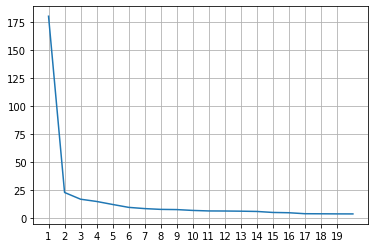

In [20]:
last = Z[-20:,2] # Cojo las distancias de Z
last_rev = last[::-1] # revertimos distancias para pintarlas
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
plt.xticks(np.arange(1,20))
plt.grid(True);

__Vemos que el número de clústers óptimo sería k=2__

### 4. Recuperamos los Clústers

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
# Mediante Distancia
max_d=25
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
# Mediante Número de Clusters
k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

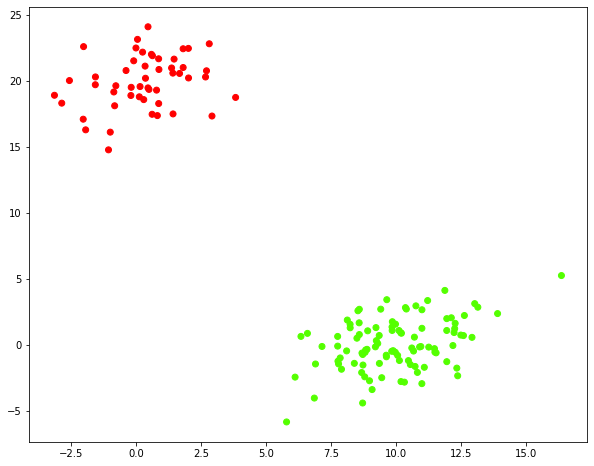

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()